In [31]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving v6_with_trajectories.xlsx to v6_with_trajectories (4).xlsx
User uploaded file "v6_with_trajectories (4).xlsx" with length 40746 bytes


In [32]:
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

display(df.head())

,student_id,marks_mean,marks_std,marks_min,marks_max,attendance_array,attempts_array,fee_late_due_date_array,dropout,slope_marks,pct_change_marks,momentum_marks,deviation_marks,slope_attendance,deviation_attendance
0,S001,"[15.666666666666666, -1.75, -1.791666666666666...","[3.619008458434744, 0.2041241452319315, 0.1717...","[8.75, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]","[20.25, -1.5, -1.5, -1.5, -1.25, -1.75, -1.75,...","[69.76666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[6, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1,-1.456845,-6.666667,-17.416667,5.770154,-5.813889,23.073156
1,S002,"[14.208333333333334, -1.9583333333333333, -1.8...","[5.2726034577068495, 0.09316949906249125, 0.12...","[5.5, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]","[19.0, -1.75, -1.75, -1.5, -1.5, -1.5, -1.25, ...","[65.73333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[6, 0, 0, 0, 0, 0, 0, 0]","[6.166666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1,-1.323413,0.000000,-16.041667,5.303741,-5.477778,21.739257
2,S003,"[10.708333333333334, 10.583333333333334, 11.29...","[3.9775847640943565, 4.554454473979903, 3.3646...","[4.5, 3.25, 8.0, 9.5, 8.25, -2.0, -2.0, -2.0]","[14.75, 17.0, 17.75, 19.5, 14.25, -1.25, -1.5,...","[41.85, 49.633333333333326, 44.58333333333334,...","[6, 15, 17, 15, 15, 0, 0, 0]","[0.0, 0.0, 0.0, 11.5, 0.0, 0.0, 0.0, 0.0]",1,-2.248512,-11.627907,-12.291667,6.462832,-8.074206,22.765372
3,S004,"[18.666666666666668, 18.25, 18.916666666666668...","[1.3743685418725538, 2.2684429314693664, 1.656...","[16.75, 14.25, 16.75, 13.5, 9.5, -2.0, -2.0, -...","[21.25, 21.25, 21.25, 20.5, 22.75, -1.75, -1.2...","[70.33333333333333, 58.51666666666667, 64.5833...","[6, 7, 7, 7, 6, 0, 0, 0]","[16.666666666666668, 4.333333333333333, 18.833...",1,-3.636905,-4.761905,-20.333333,9.786939,-11.722619,30.655159
4,S005,"[16.958333333333332, 16.916666666666668, 17.66...","[4.982085964288006, 3.104656001699526, 1.25554...","[6.0, 12.25, 15.75, 9.0, 12.25, 14.25, 14.75, ...","[20.0, 21.25, 19.5, 19.25, 21.0, 19.75, 22.0, ...","[55.03333333333333, 71.46666666666668, 67.3500...","[6, 9, 8, 7, 10, 11, 9, 10]","[0.0, 0.0, 15.833333333333334, 0.0, 6.83333333...",0,0.286706,0.000000,1.708333,1.400451,0.404563,5.506605


In [33]:
!pip install ctgan


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               120 non-null    object 
 1   marks_mean               120 non-null    object 
 2   marks_std                120 non-null    object 
 3   marks_min                120 non-null    object 
 4   marks_max                120 non-null    object 
 5   attendance_array         120 non-null    object 
 6   attempts_array           120 non-null    object 
 7   fee_late_due_date_array  120 non-null    object 
 8   dropout                  120 non-null    int64  
 9   slope_marks              120 non-null    float64
 10  pct_change_marks         120 non-null    float64
 11  momentum_marks           120 non-null    float64
 12  deviation_marks          120 non-null    float64
 13  slope_attendance         120 non-null    float64
 14  deviation_attendance     1

In [35]:
import ast
import numpy as np

# Columns in your df that contain arrays
array_cols = [
    "marks_mean",
    "marks_std",
    "marks_min",
    "marks_max",
    "attendance_array",
    "attempts_array",
    "fee_late_due_date_array"
]

SEM = 8

In [36]:
def to_list(x):
    """Converts '[1,2,3]' or list-like data into clean python list."""
    if isinstance(x, (list, tuple)):
        return list(x)
    if pd.isna(x):
        return [0]*SEM
    x = str(x).strip()
    if x.startswith("[") and x.endswith("]"):
        try:
            return list(ast.literal_eval(x))
        except:
            pass
    # fallback: comma split
    parts = [p.strip() for p in x.split(",") if p.strip() != ""]
    out = []
    for p in parts:
        try: out.append(float(p))
        except: out.append(0)
    return out

def normalize_length(arr, length=SEM):
    """Ensures array length is exactly SEM."""
    arr = list(arr)
    arr = arr[:length] + [0]*(length - len(arr))
    return arr

In [37]:
for col in array_cols:
    if col not in df.columns:
        print(f"Skipping missing column: {col}")
        continue

    print(f"Unpacking: {col}")

    # convert to lists
    lists = df[col].apply(to_list).apply(lambda L: normalize_length(L, SEM))

    # create new columns col_1 ... col_8
    for i in range(SEM):
        df[f"{col}_{i+1}"] = lists.apply(lambda L: L[i])

print("Done unpacking.")
df.head()


Unpacking: marks_mean
Unpacking: marks_std
Unpacking: marks_min
Unpacking: marks_max
Unpacking: attendance_array
Unpacking: attempts_array
Unpacking: fee_late_due_date_array
Done unpacking.


,student_id,marks_mean,marks_std,marks_min,marks_max,attendance_array,attempts_array,fee_late_due_date_array,dropout,slope_marks,...,attempts_array_7,attempts_array_8,fee_late_due_date_array_1,fee_late_due_date_array_2,fee_late_due_date_array_3,fee_late_due_date_array_4,fee_late_due_date_array_5,fee_late_due_date_array_6,fee_late_due_date_array_7,fee_late_due_date_array_8
0,S001,"[15.666666666666666, -1.75, -1.791666666666666...","[3.619008458434744, 0.2041241452319315, 0.1717...","[8.75, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]","[20.25, -1.5, -1.5, -1.5, -1.25, -1.75, -1.75,...","[69.76666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[6, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1,-1.456845,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,S002,"[14.208333333333334, -1.9583333333333333, -1.8...","[5.2726034577068495, 0.09316949906249125, 0.12...","[5.5, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]","[19.0, -1.75, -1.75, -1.5, -1.5, -1.5, -1.25, ...","[65.73333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[6, 0, 0, 0, 0, 0, 0, 0]","[6.166666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1,-1.323413,...,0,0,6.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,S003,"[10.708333333333334, 10.583333333333334, 11.29...","[3.9775847640943565, 4.554454473979903, 3.3646...","[4.5, 3.25, 8.0, 9.5, 8.25, -2.0, -2.0, -2.0]","[14.75, 17.0, 17.75, 19.5, 14.25, -1.25, -1.5,...","[41.85, 49.633333333333326, 44.58333333333334,...","[6, 15, 17, 15, 15, 0, 0, 0]","[0.0, 0.0, 0.0, 11.5, 0.0, 0.0, 0.0, 0.0]",1,-2.248512,...,0,0,0.000000,0.000000,0.000000,11.500000,0.000000,0.000000,0.000000,0.000000
3,S004,"[18.666666666666668, 18.25, 18.916666666666668...","[1.3743685418725538, 2.2684429314693664, 1.656...","[16.75, 14.25, 16.75, 13.5, 9.5, -2.0, -2.0, -...","[21.25, 21.25, 21.25, 20.5, 22.75, -1.75, -1.2...","[70.33333333333333, 58.51666666666667, 64.5833...","[6, 7, 7, 7, 6, 0, 0, 0]","[16.666666666666668, 4.333333333333333, 18.833...",1,-3.636905,...,0,0,16.666667,4.333333,18.833333,105.166667,69.333333,119.333333,116.166667,119.666667
4,S005,"[16.958333333333332, 16.916666666666668, 17.66...","[4.982085964288006, 3.104656001699526, 1.25554...","[6.0, 12.25, 15.75, 9.0, 12.25, 14.25, 14.75, ...","[20.0, 21.25, 19.5, 19.25, 21.0, 19.75, 22.0, ...","[55.03333333333333, 71.46666666666668, 67.3500...","[6, 9, 8, 7, 10, 11, 9, 10]","[0.0, 0.0, 15.833333333333334, 0.0, 6.83333333...",0,0.286706,...,9,10,0.000000,0.000000,15.833333,0.000000,6.833333,2.000000,0.000000,0.000000


In [38]:
new_data = {}
new_data["student_id"] = df["student_id"]

if "dropout" in df.columns:
    new_data["dropout"] = df["dropout"]
else:
    new_data["dropout"] = np.nan

# UNPACK
for col in array_cols:
    if col not in df.columns:
        print(f"Skipping missing: {col}")
        continue

    print(f"Unpacking: {col}")

    lists = df[col].apply(to_list).apply(lambda L: normalize_length(L, SEM))

    for i in range(SEM):
        new_data[f"{col}_{i+1}"] = lists.apply(lambda L: L[i])

df_unpacked = pd.DataFrame(new_data)
df_unpacked.head()

Unpacking: marks_mean
Unpacking: marks_std
Unpacking: marks_min
Unpacking: marks_max
Unpacking: attendance_array
Unpacking: attempts_array
Unpacking: fee_late_due_date_array


,student_id,dropout,marks_mean_1,marks_mean_2,marks_mean_3,marks_mean_4,marks_mean_5,marks_mean_6,marks_mean_7,marks_mean_8,...,attempts_array_7,attempts_array_8,fee_late_due_date_array_1,fee_late_due_date_array_2,fee_late_due_date_array_3,fee_late_due_date_array_4,fee_late_due_date_array_5,fee_late_due_date_array_6,fee_late_due_date_array_7,fee_late_due_date_array_8
0,S001,1,15.666667,-1.750000,-1.791667,-1.833333,-1.666667,-1.791667,-1.875000,-1.750000,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,S002,1,14.208333,-1.958333,-1.875000,-1.791667,-1.791667,-1.708333,-1.833333,-1.833333,...,0,0,6.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,S003,1,10.708333,10.583333,11.291667,13.458333,11.625000,-1.750000,-1.791667,-1.583333,...,0,0,0.000000,0.000000,0.000000,11.500000,0.000000,0.000000,0.000000,0.000000
3,S004,1,18.666667,18.250000,18.916667,18.583333,17.791667,-1.875000,-1.750000,-1.666667,...,0,0,16.666667,4.333333,18.833333,105.166667,69.333333,119.333333,116.166667,119.666667
4,S005,0,16.958333,16.916667,17.666667,13.916667,17.541667,17.583333,18.666667,18.666667,...,9,10,0.000000,0.000000,15.833333,0.000000,6.833333,2.000000,0.000000,0.000000


In [39]:
print(len(df_unpacked))

120


In [40]:
categorical = ['dropout']
df_unpacked = df_unpacked.drop(['student_id'],axis = 1)

In [41]:
df_unpacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   dropout                    120 non-null    int64  
 1   marks_mean_1               120 non-null    float64
 2   marks_mean_2               120 non-null    float64
 3   marks_mean_3               120 non-null    float64
 4   marks_mean_4               120 non-null    float64
 5   marks_mean_5               120 non-null    float64
 6   marks_mean_6               120 non-null    float64
 7   marks_mean_7               120 non-null    float64
 8   marks_mean_8               120 non-null    float64
 9   marks_std_1                120 non-null    float64
 10  marks_std_2                120 non-null    float64
 11  marks_std_3                120 non-null    float64
 12  marks_std_4                120 non-null    float64
 13  marks_std_5                120 non-null    float64

In [42]:
from ctgan import CTGAN

model = CTGAN(verbose=True,batch_size=500)
model.fit(df_unpacked,
          categorical,
          epochs = 250)

Gen. (0.03) | Discrim. (-0.27): 100%|██████████| 250/250 [00:49<00:00,  5.04it/s]


In [43]:
sample = model.sample(5_000)

In [44]:
sample

,dropout,marks_mean_1,marks_mean_2,marks_mean_3,marks_mean_4,marks_mean_5,marks_mean_6,marks_mean_7,marks_mean_8,marks_std_1,...,attempts_array_7,attempts_array_8,fee_late_due_date_array_1,fee_late_due_date_array_2,fee_late_due_date_array_3,fee_late_due_date_array_4,fee_late_due_date_array_5,fee_late_due_date_array_6,fee_late_due_date_array_7,fee_late_due_date_array_8
0,0,11.483773,14.228737,21.587593,20.088467,13.014192,9.510602,11.680966,27.458780,5.097375,...,8,10,7.973242,3.536137,-0.436292,-1.836469,-0.038433,4.009272,4.100280,13.910864
1,1,13.542766,18.057259,13.981292,16.816164,21.120759,16.747819,6.446739,20.921147,8.315307,...,8,8,4.294244,9.776567,2.005921,-1.734469,16.135706,-1.785557,18.186716,-1.323112
2,0,15.186154,6.611671,9.203825,21.393282,29.358088,15.588272,14.996168,18.926794,4.319462,...,13,7,9.006599,-0.166490,0.257383,-1.031183,-1.006876,5.600531,1.669156,12.052889
3,1,19.496558,26.886545,13.114946,21.808477,17.386459,21.917150,13.902018,26.038000,6.507582,...,0,1,2.055455,1.820823,8.192284,16.753634,2.905945,-2.892423,1.315565,4.401883
4,0,7.039197,28.583196,19.324143,17.257028,12.425377,23.840538,-17.223349,24.597471,4.472285,...,-2,1,-1.640765,1.902883,-0.642407,-1.951345,3.020335,0.881052,15.225245,-1.935183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,16.318330,23.844841,15.125680,13.506118,9.387515,25.384991,13.304866,21.474902,8.742217,...,8,8,-1.684347,6.228094,-2.785055,-3.597388,7.694239,-0.580740,2.478775,1.608973
4996,0,16.146296,20.690090,16.080913,19.402647,20.519190,16.259770,-14.855651,21.640308,7.421402,...,7,9,2.957243,10.366517,-0.740246,-1.613491,0.285992,2.600260,3.468879,6.667835
4997,0,15.629097,29.817501,18.125222,18.012601,18.108302,-15.567408,-18.840797,16.164827,6.447563,...,7,7,3.080694,3.151476,6.047541,4.122061,1.784349,0.684129,7.049464,0.103841
4998,0,16.039225,20.043057,15.795146,22.118738,16.010679,-14.044741,15.209478,17.362929,8.409715,...,15,10,-0.798062,0.057498,-2.564903,0.384391,-1.797903,3.109967,26.514321,10.993362


Pack again

In [52]:
# Use this to pack the correct dataframe (sampled synthetic DF)
import pandas as pd

# change these names if your sample variable uses a different name
candidates = {}
# try to pick the most likely sample variables from the notebook globals
for name in ["sample", "synth", "fake", "df_sample", "df_synth", "df_flat_sample"]:
    if name in globals():
        candidates[name] = globals()[name]

# fallback: use df_unpacked if nothing else found
if not candidates:
    print("No sample var found in globals() among ['sample','synth','fake','df_sample','df_synth','df_flat_sample'].")
    print("Falling back to df_unpacked (this is your original 120-row flattened df).")
    source_df = df_unpacked.copy()
else:
    # pick the largest candidate (most likely your sampled 5000 rows)
    best_name, best_df = max(candidates.items(), key=lambda kv: getattr(kv[1], 'shape', (0,0))[0])
    print(f"Using detected sample variable: '{best_name}' with shape {best_df.shape}")
    source_df = best_df.copy()

# sanity print
print("Source df shape:", source_df.shape)
print("Columns (first 20):", list(source_df.columns)[:20])

# now pack
SEM = 8
array_map = {
    "marks_mean": "marks_mean",
    "marks_std": "marks_std",
    "marks_min": "marks_min",
    "marks_max": "marks_max",
    "attendance_array": "attendance_array",
    "attempts_array": "attempts_array",
    "fee_late_due_date_array": "fee_late_due_date_array"
}

df_packed = pd.DataFrame()

# keep dropout if present
if "dropout" in source_df.columns:
    df_packed["dropout"] = source_df["dropout"].reset_index(drop=True)

# pack arrays
for array_name, prefix in array_map.items():
    cols = [f"{prefix}_{i+1}" for i in range(SEM)]
    missing = [c for c in cols if c not in source_df.columns]
    if missing:
        print(f"Skipping {array_name}: missing flattened cols -> {missing}")
        continue
    # pack row-wise; use .tolist() to ensure Python lists in cells
    df_packed[array_name] = source_df[cols].values.tolist()

print("Packed df shape:", df_packed.shape)
display(df_packed.head())



Using detected sample variable: 'sample' with shape (5000, 57)
Source df shape: (5000, 57)
Columns (first 20): ['dropout', 'marks_mean_1', 'marks_mean_2', 'marks_mean_3', 'marks_mean_4', 'marks_mean_5', 'marks_mean_6', 'marks_mean_7', 'marks_mean_8', 'marks_std_1', 'marks_std_2', 'marks_std_3', 'marks_std_4', 'marks_std_5', 'marks_std_6', 'marks_std_7', 'marks_std_8', 'marks_min_1', 'marks_min_2', 'marks_min_3']
Packed df shape: (5000, 8)


,dropout,marks_mean,marks_std,marks_min,marks_max,attendance_array,attempts_array,fee_late_due_date_array
0,0,"[11.48377342044787, 14.22873691806728, 21.5875...","[5.0973751350538565, 1.2007581106634673, 2.211...","[8.997065985071377, 21.058817120487312, 11.400...","[21.31255440855106, 20.716357874525812, 28.824...","[64.58044402810233, 53.43046544444715, 44.9280...","[6, 9, 6, 4, 12, 6, 8, 10]","[7.973242413429928, 3.5361369460137624, -0.436..."
1,1,"[13.54276620147063, 18.057259086376117, 13.981...","[8.31530651344457, 0.08060355815685138, 3.5399...","[13.927314044696685, 7.589154077474826, 8.8385...","[23.4354844225621, 8.507113716809839, 32.08521...","[48.340487552573805, 61.336538221298845, 44.94...","[6, 9, 16, 16, 12, 12, 8, 8]","[4.294243744628428, 9.776566720417714, 2.00592..."
2,0,"[15.18615367227953, 6.61167063764647, 9.203825...","[4.319462241803564, 4.215309042229679, 3.03057...","[11.670362960048848, 9.473938897143714, -4.413...","[21.526081980714107, 27.118354201948087, 26.02...","[59.58874364439332, 40.917537938804756, 60.660...","[6, -4, 18, 12, 5, 13, 13, 7]","[9.006599067536754, -0.16648976946970556, 0.25..."
3,1,"[19.496558048260574, 26.886545240864937, 13.11...","[6.507582102027443, 4.038279672401515, 3.65316...","[2.434331076087717, -2.70087228645005, 17.4783...","[21.722265585127353, 26.726180422087033, 26.92...","[71.51309159112597, 46.10682856287723, 78.7662...","[6, 10, 15, 14, 8, 6, 0, 1]","[2.055455009469288, 1.820822606115639, 8.19228..."
4,0,"[7.039197304879732, 28.583196430282968, 19.324...","[4.472284884487855, 0.8473459600460194, 1.1320...","[14.170989301045996, 16.42057588856665, 16.288...","[20.777530423732387, 17.36261314235881, 15.746...","[72.73482963569514, 47.51471856962135, 37.2972...","[6, 11, 5, 8, 7, 6, -2, 1]","[-1.6407646429456868, 1.9028833127139204, -0.6..."


In [53]:
print(len(df_packed))

5000


In [55]:
df_packed.to_excel("synthesied_v6_5000.xlsx")

In [47]:
!pip install table_evaluator

In [48]:
df_unpacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   dropout                    120 non-null    int64  
 1   marks_mean_1               120 non-null    float64
 2   marks_mean_2               120 non-null    float64
 3   marks_mean_3               120 non-null    float64
 4   marks_mean_4               120 non-null    float64
 5   marks_mean_5               120 non-null    float64
 6   marks_mean_6               120 non-null    float64
 7   marks_mean_7               120 non-null    float64
 8   marks_mean_8               120 non-null    float64
 9   marks_std_1                120 non-null    float64
 10  marks_std_2                120 non-null    float64
 11  marks_std_3                120 non-null    float64
 12  marks_std_4                120 non-null    float64
 13  marks_std_5                120 non-null    float64

In [49]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   dropout                    5000 non-null   int64  
 1   marks_mean_1               5000 non-null   float64
 2   marks_mean_2               5000 non-null   float64
 3   marks_mean_3               5000 non-null   float64
 4   marks_mean_4               5000 non-null   float64
 5   marks_mean_5               5000 non-null   float64
 6   marks_mean_6               5000 non-null   float64
 7   marks_mean_7               5000 non-null   float64
 8   marks_mean_8               5000 non-null   float64
 9   marks_std_1                5000 non-null   float64
 10  marks_std_2                5000 non-null   float64
 11  marks_std_3                5000 non-null   float64
 12  marks_std_4                5000 non-null   float64
 13  marks_std_5                5000 non-null   float

(120, 57) (5000, 57)


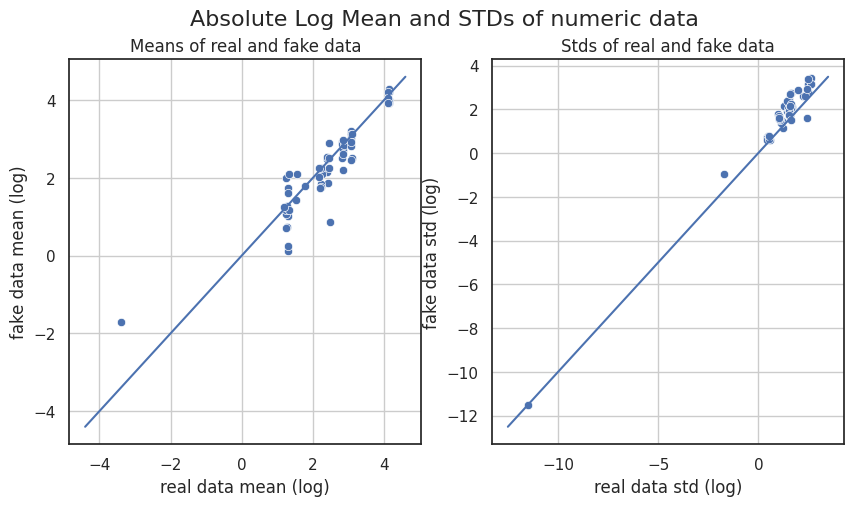

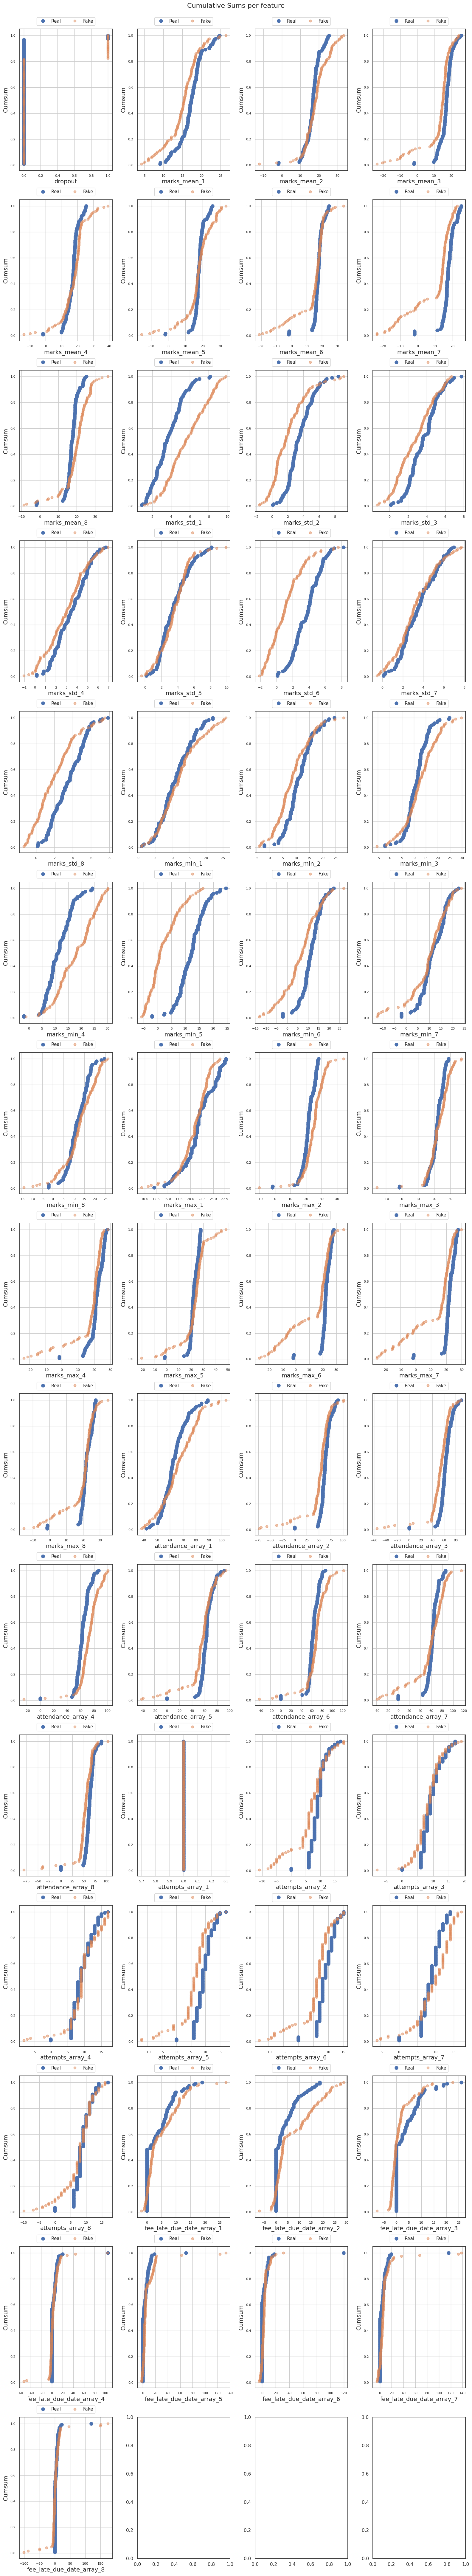

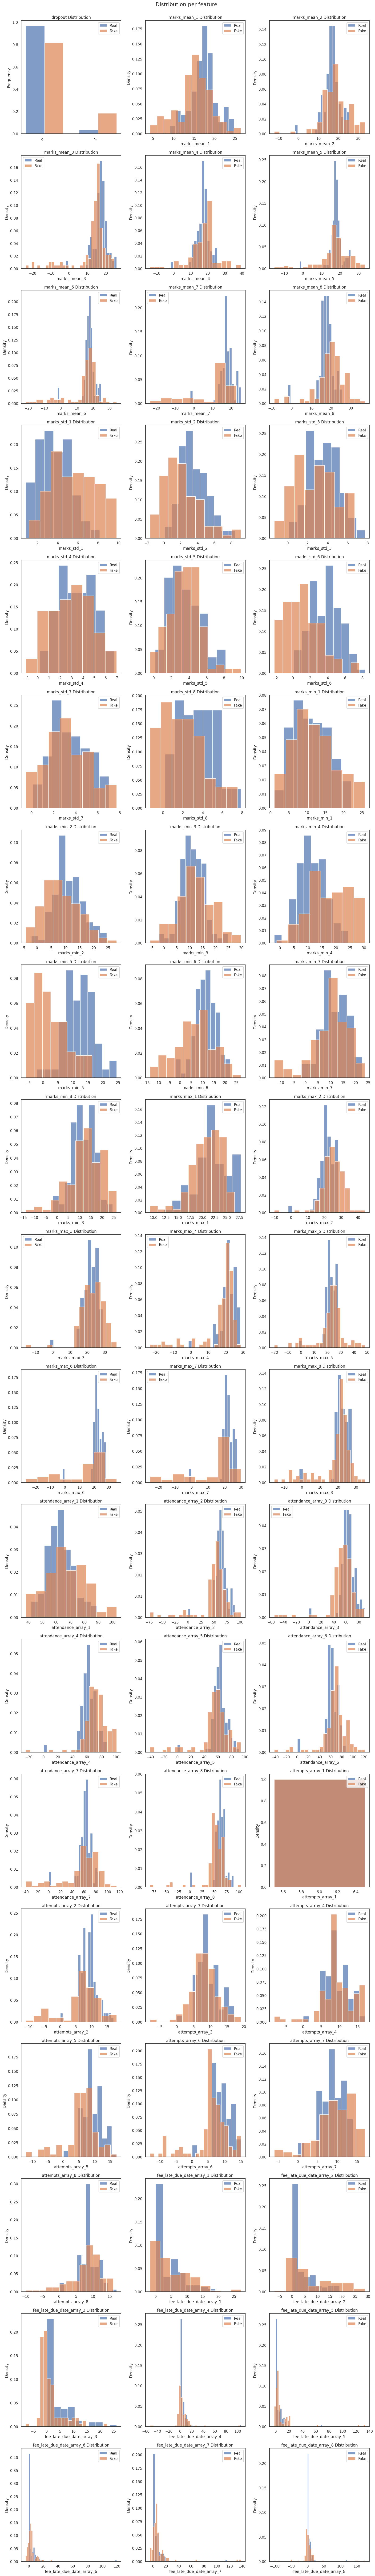

/usr/local/lib/python3.12/dist-packages/table_evaluator/association_metrics.py:333: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  assoc_value, _ = stats.pearsonr(
/usr/local/lib/python3.12/dist-packages/table_evaluator/association_metrics.py:333: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  assoc_value, _ = stats.pearsonr(


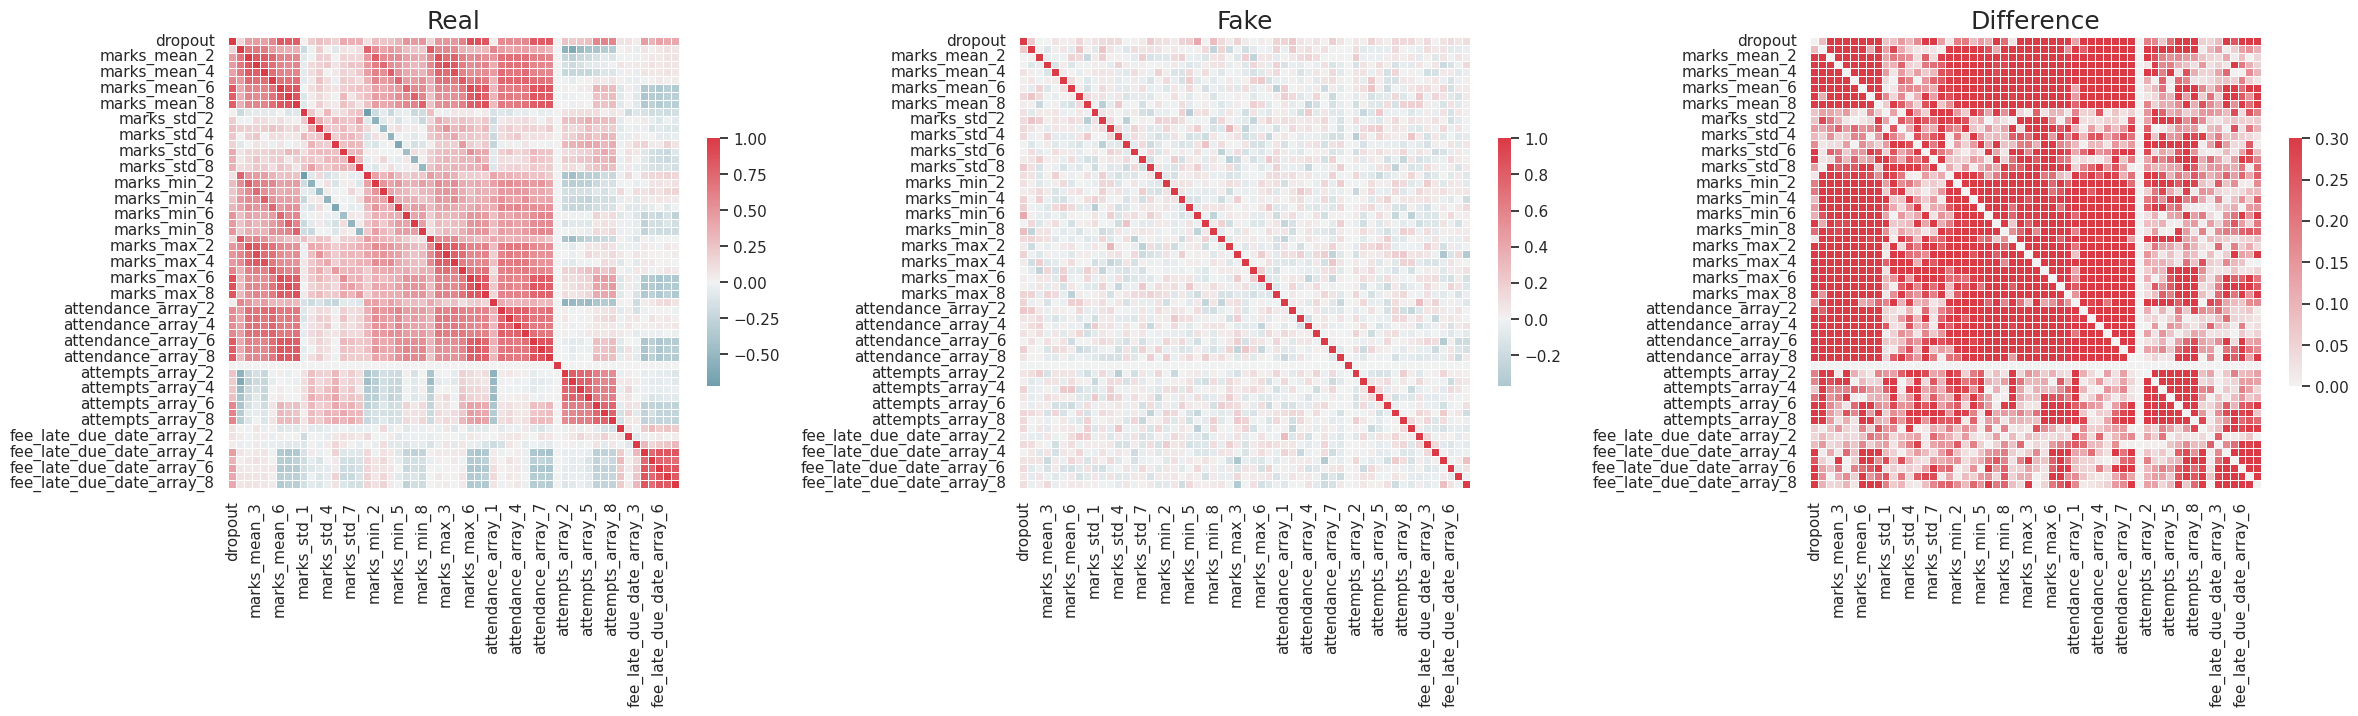

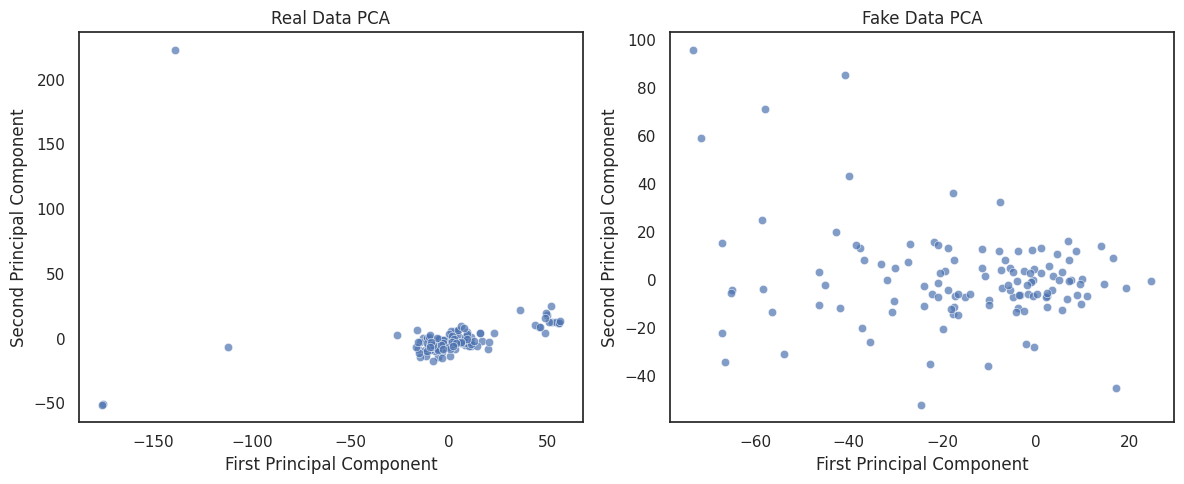

In [50]:
from table_evaluator import TableEvaluator

# compare unpack once
print(df_unpacked.shape, sample.shape)
table_evaluator =  TableEvaluator(df_unpacked, sample, cat_cols= categorical)

table_evaluator.visual_evaluation()